In [1]:
import numpy as np
import pandas as pd
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense

2023-11-29 17:44:51.605172: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 1. Load all files

In [2]:
# Stored data file name
train_data_files = ['train_FD001.txt', 'train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt']
test_data_files = ['test_FD001.txt', 'test_FD002.txt', 'test_FD003.txt', 'test_FD004.txt']
RUL_files = ['RUL_FD001.txt', 'RUL_FD002.txt', 'RUL_FD003.txt', 'RUL_FD004.txt']

# Stored Datasets
train_datasets = []
test_datasets = []
RUL_datasets = []


data_column_names = ['Unit Number', 'Time', 'OP1', 'OP2', 'OP3', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21']
rul_column_names = ["RUL"]

for file_idx in range(len(train_data_files)):
    df_train = pd.read_csv(train_data_files[file_idx], sep='\s+', header=None, names=data_column_names)
    df_test = pd.read_csv(test_data_files[file_idx], sep='\s+', header=None, names=data_column_names)
    df_rul = pd.read_csv(RUL_files[file_idx], sep='\s+', header=None, names=rul_column_names)
    train_datasets.append(df_train)
    test_datasets.append(df_test)
    RUL_datasets.append(df_rul)


# 2. Check dataset null value

In [3]:
for idx, (df1, df2, df3) in enumerate(zip(train_datasets, test_datasets, RUL_datasets)):
    if df1.isnull().values.any():
        print(f"{train_data_files[idx]} in train_datasets include null.")
    else:
        print(f"{train_data_files[idx]} in train_datasets no null.")
    if df2.isnull().values.any():
        print(f"{test_data_files[idx]} in test_datasets include null.")
    else:
        print(f"{test_data_files[idx]} in test_datasets no null.")
    if df3.isnull().values.any():
        print(f"{RUL_files[idx]} in RUL_datasets include null.")
    else:
        print(f"{RUL_files[idx]} in RUL_datasets no null.")

train_FD001.txt in train_datasets no null.
test_FD001.txt in test_datasets no null.
RUL_FD001.txt in RUL_datasets no null.
train_FD002.txt in train_datasets no null.
test_FD002.txt in test_datasets no null.
RUL_FD002.txt in RUL_datasets no null.
train_FD003.txt in train_datasets no null.
test_FD003.txt in test_datasets no null.
RUL_FD003.txt in RUL_datasets no null.
train_FD004.txt in train_datasets no null.
test_FD004.txt in test_datasets no null.
RUL_FD004.txt in RUL_datasets no null.


# 3. Feature select


Features selected by variance method: ['S2', 'S3', 'S4', 'S7', 'S9', 'S11', 'S12', 'S14', 'S17', 'S20']
Features selected by Random Forest: ['OP1', 'OP2', 'S2', 'S3', 'S4', 'S7', 'S8', 'S9', 'S11', 'S12', 'S13', 'S14', 'S15', 'S20', 'S21']
Final selected features: ['S14', 'S20', 'S2', 'S9', 'S3', 'S11', 'S12', 'S4', 'S7']


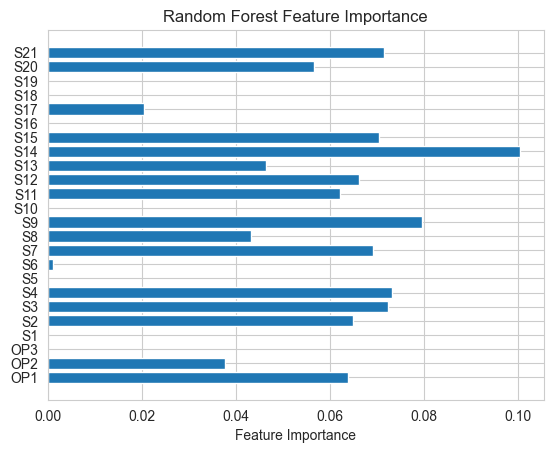


Features selected by variance method: ['OP1', 'OP2', 'OP3', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S11', 'S12', 'S13', 'S14', 'S15', 'S17', 'S18', 'S19', 'S20', 'S21']
Features selected by Random Forest: ['OP1', 'OP2', 'S2', 'S3', 'S4', 'S7', 'S8', 'S9', 'S11', 'S12', 'S13', 'S14', 'S15', 'S20', 'S21']
Final selected features: ['OP2', 'S14', 'S21', 'S15', 'S20', 'S2', 'S3', 'S9', 'S11', 'S13', 'S8', 'S12', 'S4', 'S7', 'OP1']


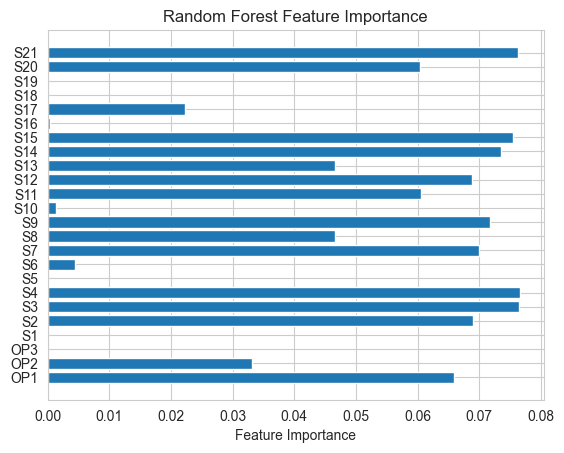


Features selected by variance method: ['S2', 'S3', 'S4', 'S7', 'S8', 'S9', 'S11', 'S12', 'S13', 'S14', 'S17', 'S20', 'S21']
Features selected by Random Forest: ['OP1', 'OP2', 'S2', 'S3', 'S4', 'S6', 'S7', 'S8', 'S9', 'S11', 'S12', 'S13', 'S14', 'S15', 'S20', 'S21']
Final selected features: ['S14', 'S21', 'S20', 'S2', 'S3', 'S9', 'S11', 'S13', 'S8', 'S12', 'S4', 'S7']


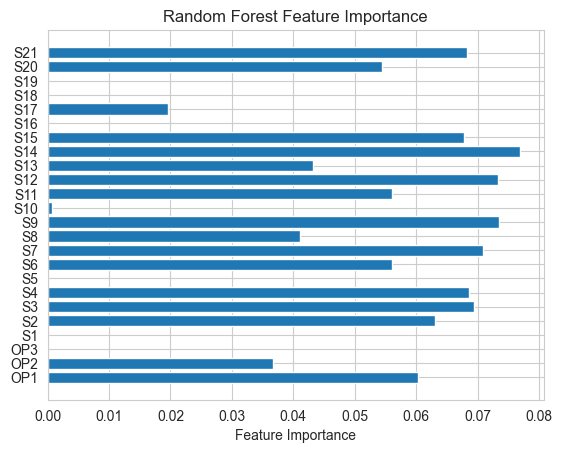


Features selected by variance method: ['OP1', 'OP2', 'OP3', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S11', 'S12', 'S13', 'S14', 'S15', 'S17', 'S18', 'S19', 'S20', 'S21']
Features selected by Random Forest: ['OP1', 'OP2', 'S2', 'S3', 'S4', 'S7', 'S8', 'S9', 'S11', 'S12', 'S13', 'S14', 'S15', 'S20', 'S21']
Final selected features: ['OP2', 'S14', 'S21', 'S15', 'S20', 'S2', 'S3', 'S9', 'S11', 'S13', 'S8', 'S12', 'S4', 'S7', 'OP1']


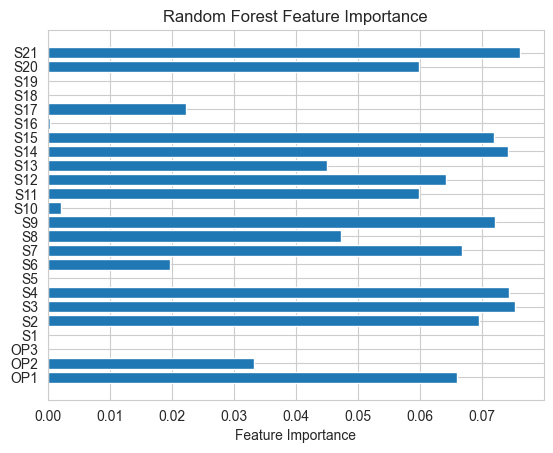

In [4]:
#selected_feature_dataset = [['S2', 'S3', 'S4', 'S7', 'S9', 'S11', 'S12', 'S14', 'S20'], ['OP1', 'OP2', 'S2', 'S3' , 'S4', 'S7', 'S8', 'S9', 'S11', 'S12', 'S13', 'S14', 'S15', 'S20', 'S21'], ['S2', 'S3', 'S4', 'S7', 'S8', 'S9','S11', 'S12', 'S13', 'S14', 'S20', 'S21'], ['OP1', 'OP2', 'S2', 'S3' , 'S4', 'S7', 'S8', 'S9', 'S11', 'S12', 'S13', 'S14', 'S15', 'S20', 'S21']]
selected_feature_dataset = []
for file_idx in range(len(train_data_files)):
    # Calculate the variances to find the important features
    data_array = train_datasets[file_idx].iloc[:, 2:].values
    variances = np.var(data_array, axis=0)
    variance_threshold = 0.02
    variance_selected_columns = train_datasets[file_idx].iloc[:, 2:].columns[variances > variance_threshold]

    # Use Random Forest to find the important features
    model = RandomForestRegressor(random_state=50)
    model.fit(train_datasets[file_idx].iloc[:, 2:], train_datasets[file_idx].iloc[:, :1].squeeze())
    #model.fit(train_datasets[file_idx].iloc[:, 2:], train_datasets[file_idx].iloc[:, 2:]) #unsupervised training for feature selection
    feature_importances = model.feature_importances_
    print()
    rf_selected_columns = train_datasets[file_idx].iloc[:, 2:].columns[feature_importances > 0.025]

    # Get the same features from two methods
    common_selected_columns = set(variance_selected_columns) & set(rf_selected_columns)
    final_selected_features = list(common_selected_columns)
    selected_feature_dataset.append(final_selected_features)

    print("Features selected by variance method:", list(variance_selected_columns))
    print("Features selected by Random Forest:", list(rf_selected_columns))
    print("Final selected features:", final_selected_features)
    plt.barh(train_datasets[file_idx].iloc[:, 2:].columns, feature_importances)
    plt.xlabel('Feature Importance')
    plt.title('Random Forest Feature Importance')
    plt.show()

# 4. Normalize dataset

In [5]:
### remove feature selection

# using new feature get new datasets
new_train_datasets = []
new_test_datasets = []
for i in range(len(train_datasets)):
    new_feature = selected_feature_dataset[i]
    new_train = pd.merge(train_datasets[i].iloc[:,:2], train_datasets[i][new_feature], left_index=True, right_index=True)
    new_test = pd.merge(test_datasets[i].iloc[:,:2], test_datasets[i][new_feature], left_index=True, right_index=True)
    new_train_datasets.append(new_train)
    new_test_datasets.append(new_test)

# MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
for file_idx in range(len(new_train_datasets)):
    new_train_datasets[file_idx].iloc[:,2:] = scaler.fit_transform(new_train_datasets[file_idx].iloc[:,2:])
    new_test_datasets[file_idx].iloc[:,2:] = scaler.transform(new_test_datasets[file_idx].iloc[:,2:])
print(new_train_datasets)
print(new_test_datasets)

[       Unit Number  Time       S14       S20        S2        S9        S3  \
0                1     1  0.199608  0.713178  0.183735  0.109755  0.406802   
1                1     2  0.162813  0.666667  0.283133  0.100242  0.453019   
2                1     3  0.171793  0.627907  0.343373  0.140043  0.369523   
3                1     4  0.174889  0.573643  0.343373  0.124518  0.256159   
4                1     5  0.174734  0.589147  0.349398  0.149960  0.257467   
...            ...   ...       ...       ...       ...       ...       ...   
20626          100   196  0.194344  0.271318  0.686747  0.196491  0.587312   
20627          100   197  0.188668  0.124031  0.701807  0.194651  0.729453   
20628          100   198  0.212148  0.232558  0.665663  0.198196  0.684979   
20629          100   199  0.203065  0.116279  0.608434  0.233285  0.746021   
20630          100   200  0.192951  0.178295  0.795181  0.178363  0.639634   

            S11       S12        S4        S7  
0      0.36904

# 5. Calculate the RUL

In [6]:
RUL_train = []
RUL_test = []

for file_idx in range(len(new_train_datasets)):
    df_temp = new_train_datasets[file_idx].iloc[:,:2]
    temp_max = df_temp.groupby('Unit Number')['Time'].max()
    df_temp['Max_Time'] = df_temp['Unit Number'].map(temp_max)
    df_temp['RUL'] = df_temp['Max_Time'] - df_temp['Time']
    RUL_train.append(df_temp[['Unit Number', 'RUL']])

    df_temp = new_test_datasets[file_idx].iloc[:,:2]
    temp_max = df_temp.groupby('Unit Number')['Time'].max()
    df_temp['Max_Time'] = df_temp['Unit Number'].map(temp_max)
    df_temp['RUL'] = df_temp['Max_Time'] - df_temp['Time']
    RUL_test.append(df_temp[['Unit Number', 'RUL']])
    print(RUL_train)

[       Unit Number  RUL
0                1  191
1                1  190
2                1  189
3                1  188
4                1  187
...            ...  ...
20626          100    4
20627          100    3
20628          100    2
20629          100    1
20630          100    0

[20631 rows x 2 columns]]
[       Unit Number  RUL
0                1  191
1                1  190
2                1  189
3                1  188
4                1  187
...            ...  ...
20626          100    4
20627          100    3
20628          100    2
20629          100    1
20630          100    0

[20631 rows x 2 columns],        Unit Number  RUL
0                1  148
1                1  147
2                1  146
3                1  145
4                1  144
...            ...  ...
53754          260    4
53755          260    3
53756          260    2
53757          260    1
53758          260    0

[53759 rows x 2 columns]]
[       Unit Number  RUL
0                1  191
1   

In [7]:
combine_train = new_train_datasets.copy()
combine_test = new_test_datasets.copy()

for file_idx in range(len(combine_train)):
    rul_column_train = RUL_train[file_idx]['RUL']
    rul_column_test = RUL_test[file_idx]['RUL']

    combine_train[file_idx]['Time'] = rul_column_train.values
    combine_test[file_idx]['Time'] = rul_column_test.values
    combine_train[file_idx] = combine_train[file_idx].rename(columns={'Time': 'RUL'})
    combine_test[file_idx] = combine_test[file_idx].rename(columns={'Time': 'RUL'})


In [8]:
print(combine_test[0])

       Unit Number  RUL       S14       S20        S2        S9        S3  \
0                1   30  0.132160  0.558140  0.545181  0.127614  0.310661   
1                1   29  0.204768  0.682171  0.150602  0.146684  0.379551   
2                1   28  0.155640  0.728682  0.376506  0.158081  0.346632   
3                1   27  0.170090  0.666667  0.370482  0.105717  0.285154   
4                1   26  0.152751  0.658915  0.391566  0.102396  0.352082   
...            ...  ...       ...       ...       ...       ...       ...   
13091          100    4  0.584890  0.395349  0.611446  0.541326  0.619359   
13092          100    3  0.572350  0.333333  0.605422  0.533743  0.537388   
13093          100    2  0.605326  0.372093  0.671687  0.561249  0.482014   
13094          100    1  0.622046  0.403101  0.617470  0.570403  0.522128   
13095          100    0  0.591908  0.434109  0.524096  0.598133  0.666667   

            S11       S12        S4        S7  
0      0.208333  0.646055  

# 6. Creating sliding window sequences for LSTM

In [9]:
def create_sequence_data(data, window_size):
    sequences = []
    for i in range(len(data) - window_size +1):
        seq = data[i:i + window_size]
        sequences.append(seq)
    return np.array(sequences)

window_size = 10
x_train = []
y_train = []
for i in range(len(train_datasets)):
    temp_x_train = []
    temp_y_train = []
    for j in range(1, (len(combine_train[i]['Unit Number'].unique())) + 1):
        temp_train_dataset = combine_train[i][combine_train[i]['Unit Number'] == j].drop(['Unit Number', 'RUL'], axis=1).values
        temp_train_rul = combine_train[i][combine_train[i]['Unit Number'] == j]['RUL'].values
        temp_train_dataset = create_sequence_data(temp_train_dataset, window_size)
        temp_train_rul = create_sequence_data(temp_train_rul, window_size)
        temp_x_train.append(temp_train_dataset)
        temp_y_train.append(temp_train_rul[:, -1])

    x_train.append(np.concatenate(temp_x_train))
    y_train.append(np.concatenate(temp_y_train))

x_test = []
y_test = []
for i in range(len(test_datasets)):
    temp_x_test = []
    temp_y_test = []
    for j in range(1, (len(combine_test[i]['Unit Number'].unique())) + 1):
        temp_test_dataset = combine_test[i][combine_test[i]['Unit Number'] == j].drop(['Unit Number', 'RUL'], axis=1).values
        sequences = []
        last_window = temp_test_dataset[-window_size:]
        sequences.append(last_window)
        temp_x_test.append(np.array(sequences))
    x_test.append(np.concatenate(temp_x_test))
        #temp_test_dataset = combine_test[i][combine_test[i]['Unit Number'] == j].drop(['Unit Number'], axis=1)
        #temp_test_rul = combine_test[i][combine_test[i]['Unit Number'] == j]['RUL']
        #max_time_data = temp_test_dataset.iloc[-1]
        #max_RUL_data = pd.Series(temp_test_rul.iloc[-1])
        #temp_x_test.append(max_time_data)
        #temp_y_test.append(max_RUL_data)
    #x_test.append(pd.concat(temp_x_test, axis=1).transpose())
    #y_test.append(pd.concat(temp_y_test))

In [10]:
print(x_test[0])

[[[0.14939622 0.62015504 0.37349398 ... 0.57995736 0.3681634  0.57648953]
  [0.16013004 0.74418605 0.27409639 ... 0.70575693 0.21674544 0.84057971]
  [0.15873671 0.62015504 0.33433735 ... 0.71855011 0.3021607  0.55072464]
  ...
  [0.17127671 0.68217054 0.22289157 ... 0.78891258 0.26772451 0.69243156]
  [0.17984312 0.73643411 0.47590361 ... 0.65884861 0.3160027  0.68438003]
  [0.15569202 0.51937984 0.4126506  ... 0.66098081 0.2812289  0.73590982]]

 [[0.14268758 0.46511628 0.43373494 ... 0.68656716 0.43163403 0.61674718]
  [0.13185055 0.52713178 0.47289157 ... 0.59275053 0.39736664 0.57809984]
  [0.13788833 0.57364341 0.46084337 ... 0.60127932 0.45324105 0.65378422]
  ...
  [0.14877696 0.57364341 0.4939759  ... 0.75479744 0.3541526  0.70692432]
  [0.13267623 0.65891473 0.43072289 ... 0.56076759 0.50151924 0.55555556]
  [0.13912684 0.51937984 0.40361446 ... 0.65031983 0.48244429 0.59098229]]

 [[0.13768191 0.65116279 0.42168675 ... 0.445629   0.61394328 0.47504026]
  [0.15295696 0.480620

In [11]:
for i in range(4):
    print("For FD00" + str(i+1) + "\n")
    print("Train Dataset Shape: ", x_train[i].shape)
    print("Train RUL Dataset Shape: ", y_train[i].shape)
    print("Test Dataset Shape: ", x_test[i].shape)

For FD001

Train Dataset Shape:  (19731, 10, 9)
Train RUL Dataset Shape:  (19731,)
Test Dataset Shape:  (100, 10, 9)
For FD002

Train Dataset Shape:  (51419, 10, 15)
Train RUL Dataset Shape:  (51419,)
Test Dataset Shape:  (259, 10, 15)
For FD003

Train Dataset Shape:  (23820, 10, 12)
Train RUL Dataset Shape:  (23820,)
Test Dataset Shape:  (100, 10, 12)
For FD004

Train Dataset Shape:  (59008, 10, 15)
Train RUL Dataset Shape:  (59008,)
Test Dataset Shape:  (248, 10, 15)


# 7. Build LSTM

In [12]:
from keras import optimizers
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=128, return_sequences = False, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [13]:
# start with lstm model

set_epoch = 50

trained_models = []
logs = []

for i in range(len(x_train)):
    input_shape = (window_size, combine_train[i].drop(['Unit Number','RUL'], axis=1).shape[1])
    model = create_lstm_model(input_shape)

    display(model.summary())
    ll = model.fit(x_train[i], y_train[i], epochs=set_epoch, batch_size=128, verbose=1) #, validation_split = 0.3)
    #loss = model.evaluate(x_test[i], y_test[i], verbose=1)
    #print(f'Test Loss: {loss}')

    trained_models.append(model)
    logs.append(ll)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               70656     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 70785 (276.50 KB)
Trainable params: 70785 (276.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None

Epoch 1/50
155/155 [==============================] - 4s 15ms/step - loss: 11351.7930
Epoch 2/50
155/155 [==============================] - 2s 14ms/step - loss: 8280.7139
Epoch 3/50
155/155 [==============================] - 2s 15ms/step - loss: 6580.4863
Epoch 4/50
155/155 [==============================] - 2s 15ms/step - loss: 5547.5449
Epoch 5/50
155/155 [==============================] - 2s 16ms/step - loss: 4956.4736
Epoch 6/50
155/155 [==============================] - 2s 16ms/step - loss: 4663.3115
Epoch 7/50
155/155 [==============================] - 2s 15ms/step - loss: 4528.9702
Epoch 8/50
155/155 [==============================] - 2s 14ms/step - loss: 4474.3701
Epoch 9/50
155/155 [==============================] - 2s 15ms/step - loss: 4454.6494
Epoch 10/50
155/155 [==============================] - 2s 15ms/step - loss: 4448.5439
Epoch 11/50
155/155 [==============================] - 2s 15ms/step - loss: 4447.0205
Epoch 12/50
155/155 [==============================] - 2s 15ms

None

Epoch 1/50
402/402 [==============================] - 8s 15ms/step - loss: 9370.7031
Epoch 2/50
402/402 [==============================] - 6s 15ms/step - loss: 5497.1992
Epoch 3/50
402/402 [==============================] - 6s 15ms/step - loss: 4606.8647
Epoch 4/50
402/402 [==============================] - 6s 15ms/step - loss: 4494.4463
Epoch 5/50
402/402 [==============================] - 6s 14ms/step - loss: 4487.6289
Epoch 6/50
402/402 [==============================] - 6s 15ms/step - loss: 4487.3447
Epoch 7/50
402/402 [==============================] - 6s 15ms/step - loss: 4487.4678
Epoch 8/50
402/402 [==============================] - 6s 14ms/step - loss: 4487.4326
Epoch 9/50
402/402 [==============================] - 6s 14ms/step - loss: 4487.5103
Epoch 10/50
402/402 [==============================] - 6s 14ms/step - loss: 4487.3940
Epoch 11/50
402/402 [==============================] - 6s 14ms/step - loss: 4487.3770
Epoch 12/50
402/402 [==============================] - 6s 15ms/

None

Epoch 1/50
187/187 [==============================] - 5s 14ms/step - loss: 21343.7324
Epoch 2/50
187/187 [==============================] - 3s 14ms/step - loss: 16567.6660
Epoch 3/50
187/187 [==============================] - 3s 14ms/step - loss: 13665.1768
Epoch 4/50
187/187 [==============================] - 3s 14ms/step - loss: 11802.8682
Epoch 5/50
187/187 [==============================] - 2s 13ms/step - loss: 10665.0713
Epoch 6/50
187/187 [==============================] - 3s 14ms/step - loss: 10017.8496
Epoch 7/50
187/187 [==============================] - 3s 14ms/step - loss: 9688.1270
Epoch 8/50
187/187 [==============================] - 3s 14ms/step - loss: 9532.2334
Epoch 9/50
187/187 [==============================] - 3s 14ms/step - loss: 9468.2969
Epoch 10/50
187/187 [==============================] - 3s 14ms/step - loss: 9444.5195
Epoch 11/50
187/187 [==============================] - 3s 14ms/step - loss: 9436.8125
Epoch 12/50
187/187 [==============================] - 3s

None

Epoch 1/50
461/461 [==============================] - 8s 14ms/step - loss: 15595.2803
Epoch 2/50
461/461 [==============================] - 9s 19ms/step - loss: 9597.6748
Epoch 3/50
461/461 [==============================] - 9s 18ms/step - loss: 7996.3384
Epoch 4/50
461/461 [==============================] - 6s 14ms/step - loss: 7731.3550
Epoch 5/50
461/461 [==============================] - 6s 13ms/step - loss: 7708.8623
Epoch 6/50
461/461 [==============================] - 8s 17ms/step - loss: 7707.9751
Epoch 7/50
461/461 [==============================] - 6s 14ms/step - loss: 7707.8481
Epoch 8/50
461/461 [==============================] - 6s 13ms/step - loss: 7707.9624
Epoch 9/50
461/461 [==============================] - 7s 14ms/step - loss: 7708.0278
Epoch 10/50
461/461 [==============================] - 6s 14ms/step - loss: 7708.3853
Epoch 11/50
461/461 [==============================] - 6s 13ms/step - loss: 7707.6367
Epoch 12/50
461/461 [==============================] - 6s 14ms

In [14]:
all_predictions = []

for i in range(len(x_train)):
    predicted = trained_models[i].predict(x_test[i])
    all_predictions.append(predicted)

8/8 [==============================] - 0s 3ms/step


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
!pip install lifelines
for index, prediction in enumerate(all_predictions):
    error = np.sqrt(mean_squared_error(RUL_datasets[index], prediction))
    print(f"For FD00{index + 1}")
    print(f"Root Mean Square Error: {error}")
    r2_value = r2_score(RUL_datasets[index], prediction)
    print(f"R2 Score: {r2_value}")
    print("\n")

For FD001
Root Mean Square Error: 31.09861139427314
R2 Score: 0.43995561063092714


For FD002
Root Mean Square Error: 33.06602975282236
R2 Score: 0.6219563185685096


For FD003
Root Mean Square Error: 46.413822721964415
R2 Score: -0.2571463333433355


For FD004
Root Mean Square Error: 42.707411424959105
R2 Score: 0.3864720199174083


For FD001


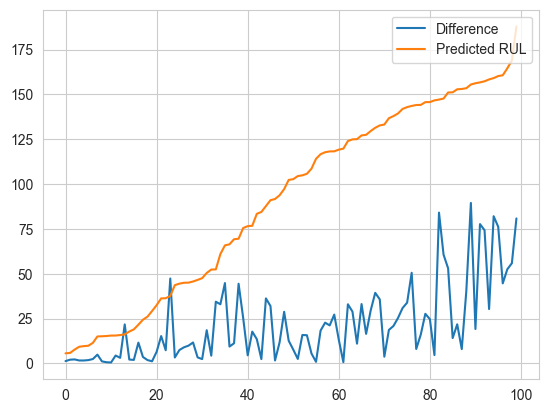



For FD002


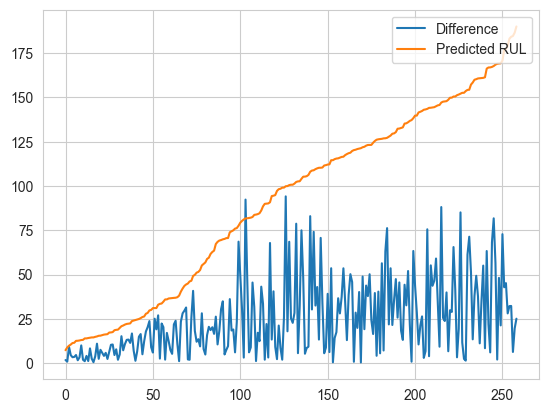



For FD003


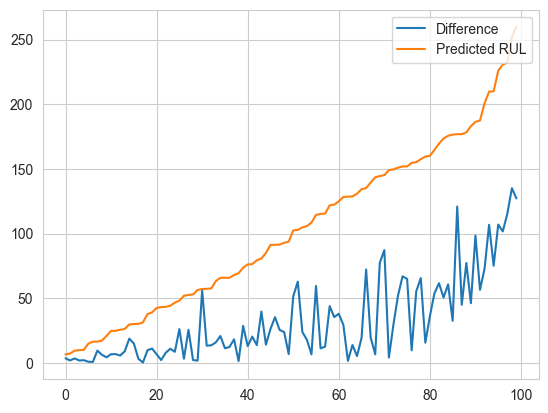



For FD004


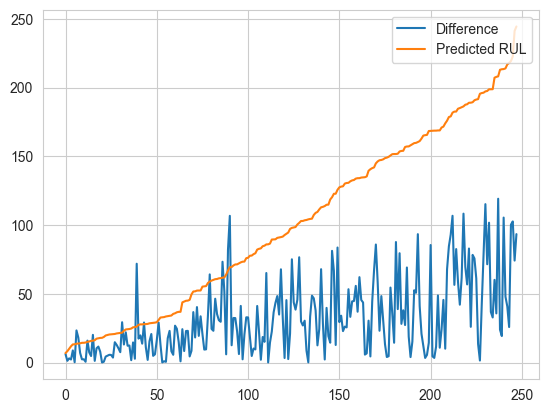

In [46]:

for i in range(4):
    listA = abs(RUL_datasets[i] - all_predictions[i])['RUL'].tolist()
    listB = all_predictions[i].flatten().tolist()
    combined_list = list(zip(listA, listB))
    sorted_combined_list = sorted(combined_list, key=lambda x: x[1])
    sorted_listA, sorted_listB = zip(*sorted_combined_list)
    print("For FD00" + str(i+1) + "\n")
    plt.plot(sorted_listA, label = "Difference")
    plt.plot(sorted_listB, label = "Predicted RUL")
    plt.legend(loc = 'upper right')
    plt.show()
    print("\n")



# for i in range(len(x_train)):
#     print("For FD00" + str(i+1) + "\n")
#     plt.plot(abs(RUL_datasets[i] - all_predictions[i]), label = "Difference")
#     plt.plot(all_predictions[i], label = "Predicted RUL")
#     plt.legend(loc = 'upper right')
#     plt.show()
#     print("\n")